In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the dataset

data = pd.read_csv('Customers_in_a_Shop.csv',header=None)
data.head()

,0,1
0,1949-01,114.0
1,1949-02,120.0
2,1949-03,134.0
3,1949-04,67.0
4,1949-05,123.0


In [3]:
data.columns = ['Date','Customers']
data['Date'] = pd.to_datetime(data['Date'],format="%Y-%m")
data = data.set_index('Date')
data.head()

,Customers
Date,
1949-01-01,114.0
1949-02-01,120.0
1949-03-01,134.0
1949-04-01,67.0
1949-05-01,123.0


In [4]:
data.tail()

,Customers
Date,
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,720.0
1960-11-01,750.0
1960-12-01,732.0


In [5]:
data.shape

(144, 1)

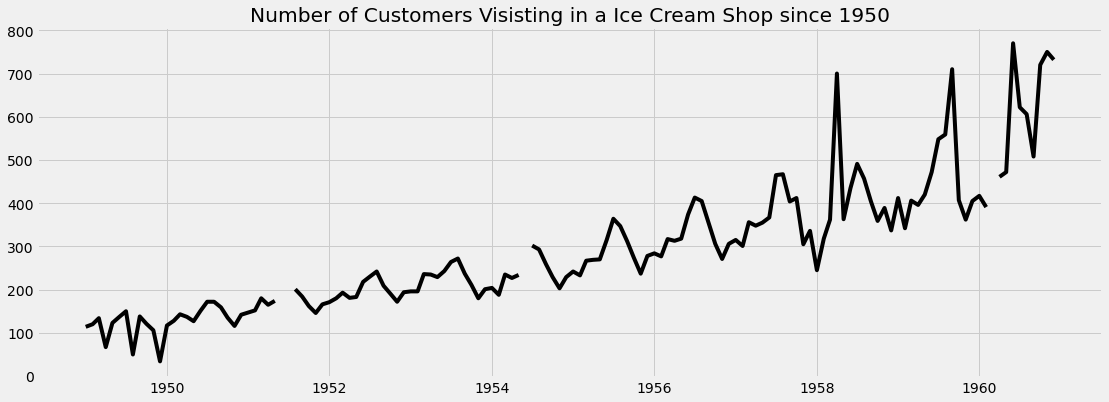

In [6]:
#Checking for the missing values

plt.rcParams['figure.figsize']=(17,6)
plt.plot(data,color='black')
plt.title("Number of Customers Visisting in a Ice Cream Shop since 1950")
plt.show()

## We have the following methods for treating missing values in the time series data.
1)	Mean Imputation

2)	Last Observation Carried forward

3)	Linear Interpolation

4)	Seasonal Interpolation

### Mean Imputation

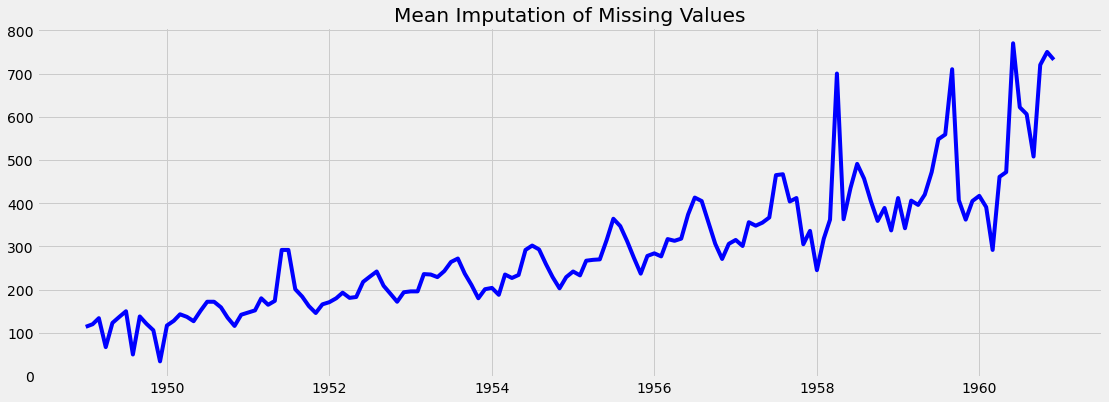

In [7]:
plt.rcParams['figure.figsize']=(17,6)

data['Customers_mean'] = data['Customers'].fillna(data['Customers'].mean())
plt.plot(data['Customers_mean'],color='blue')
plt.title("Mean Imputation of Missing Values")
plt.show()

### Last Observation Carried Forward(LOCF)

1. Its impute the missing values with previous in the data
2. its can be done with bfill() function

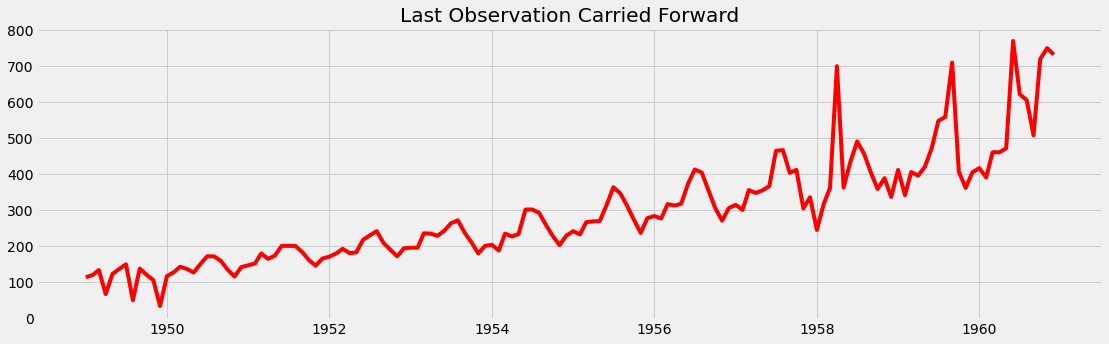

In [8]:
plt.rcParams['figure.figsize']=(17,5)
data['Customers_mean'] = data['Customers'].bfill()
plt.plot(data['Customers_mean'],color='red')
plt.title("Last Observation Carried Forward")
plt.show()

### Linear Interpolation
1. In Linear interpolation we draw a staright line joining the previous & next points of the missing values
2. It uses interpolate() function to interpolate.

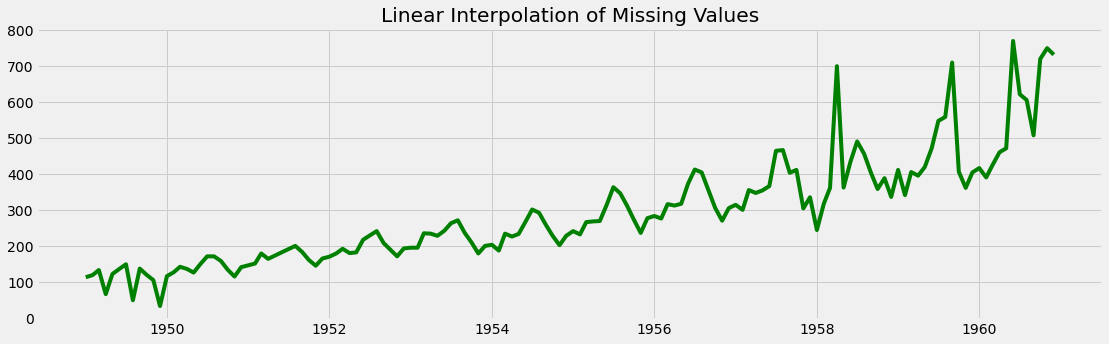

In [9]:
plt.rcParams['figure.figsize']=(17,5)
data['Customers_linear']=data['Customers'].interpolate(method='linear')
plt.plot(data['Customers_linear'],color='green')
plt.title("Linear Interpolation of Missing Values")
plt.show()

### Seasonal Interpolation

In [10]:
# lets find the dates where we have missing values
data.index[data['Customers'].isnull()]

DatetimeIndex(['1951-06-01', '1951-07-01', '1954-06-01', '1960-03-01'], dtype='datetime64[ns]', name='Date', freq=None)

In [11]:
data.loc['1960-03'].fillna((data['1949-03':'1959-03':12].sum())/data['1949-03':'1959-03':12].shape[0], inplace=True)
data.loc['1954-06'].fillna((data['1949-06':'1953-06':12].sum())/data['1949-06':'1953-06':12].shape[0], inplace=True)
data.loc['1951-07'].fillna((data['1949-07':'1950-07':12].sum())/data.loc['1949-07':'1950-07':12].shape[0], inplace=True)
data.loc['1951-06'].fillna((data['1949-06':'1950-06':12].sum())/data['1949-06':'1950-06':12].shape[0], inplace=True)

In [12]:
data.isnull().sum().sum()

0

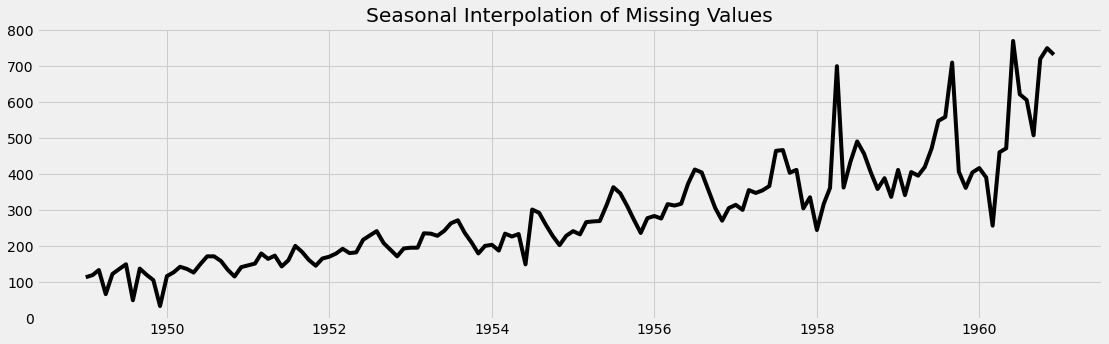

In [13]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(data['Customers'],color='black')
plt.title("Seasonal Interpolation of Missing Values")
plt.show()

## Checking for Outliers

## Box plot
It is a standardized way of displaying the distribution of data. Any data points which are less than Q1-1.5IQR or greater than Q3+1.5IQR are considered to be outliers.

<AxesSubplot:xlabel='Customers_linear'>

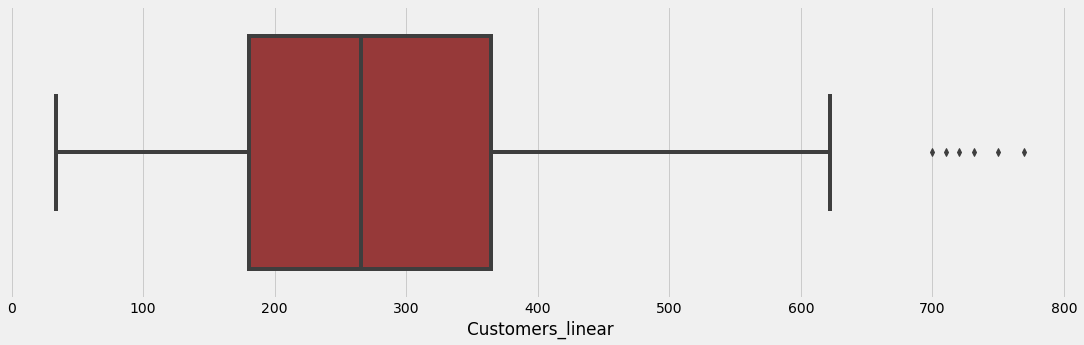

In [14]:
plt.rcParams['figure.figsize']=(17,5)
sns.boxplot(data['Customers_linear'], color='brown')

In [15]:
data['Customers_linear'].sort_values(ascending = False).head(7)

Date
1960-06-01    770.0
1960-11-01    750.0
1960-12-01    732.0
1960-10-01    720.0
1959-09-01    710.0
1958-04-01    700.0
1960-07-01    622.0
Name: Customers_linear, dtype: float64

In [16]:
# outliers treatment

data['Customers_linear'].loc[(data['Customers_linear']>=700)] = 622
# lets also check the null values again
data.isnull().sum()

Customers           0
Customers_mean      0
Customers_linear    0
dtype: int64

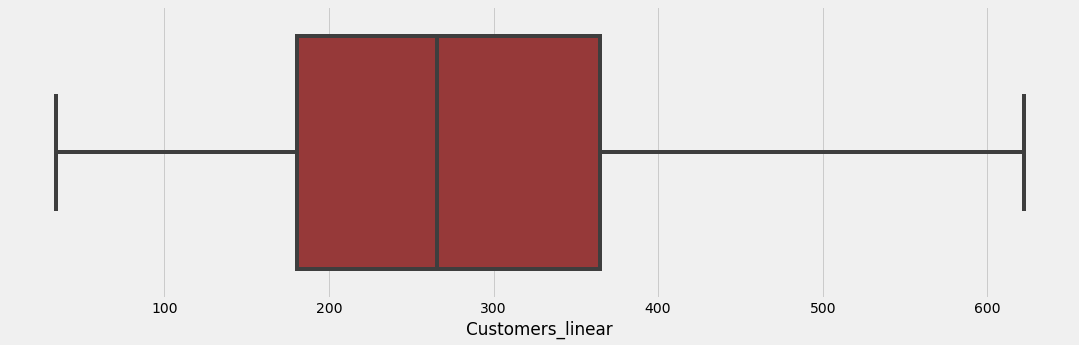

In [17]:
plt.rcParams['figure.figsize']=(17,5)
sns.boxplot(data['Customers_linear'], color='brown')
plt.show()

In [18]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


## Time Series Decomposition 

In [22]:
import statsmodels.api as sm

## Additive Seasonal Decomposition

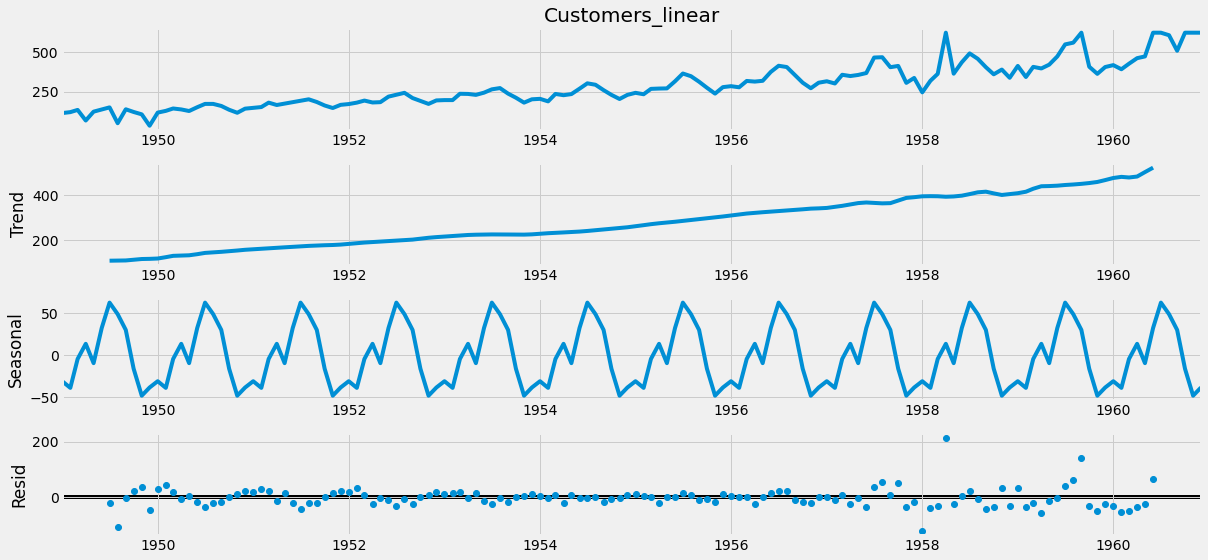

In [23]:
plt.rcParams['figure.figsize'] = (17,8)

decomposition = sm.tsa.seasonal_decompose(data['Customers_linear'], model='additive')
decomposition.plot()
                                          
plt.show()

## Multiplicative Seasonal Decomposition

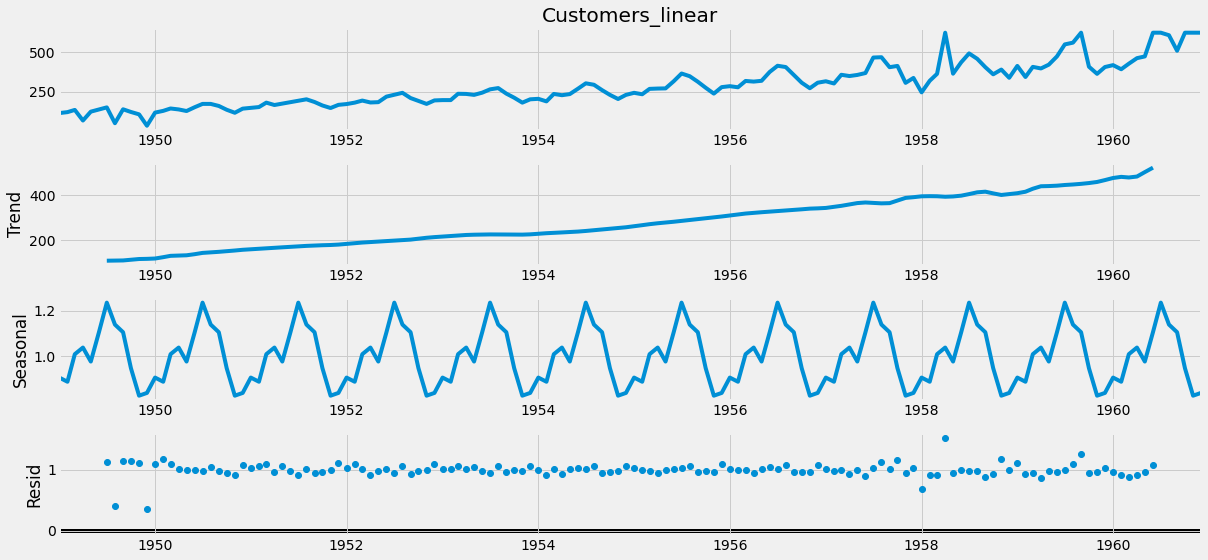

In [24]:
plt.rcParams['figure.figsize'] = (17,8)

decomposition = sm.tsa.seasonal_decompose(data['Customers_linear'], model='multiplicative')
decomposition.plot()
                                          
plt.show()

## Splitting Train and Test data

In [25]:
length_train = 115
train = data.iloc[:length_train,:]
test=data.iloc[length_train:,: ]

In [26]:
# lets check the shape of train

print(train.shape)
train.tail()

(115, 3)


,Customers,Customers_mean,Customers_linear
Date,,,
1958-03-01,362.0,362.0,362.0
1958-04-01,700.0,700.0,622.0
1958-05-01,363.0,363.0,363.0
1958-06-01,435.0,435.0,435.0
1958-07-01,491.0,491.0,491.0


In [27]:
# lets check the shape of test

print(train.shape)
test.head()

(115, 3)


,Customers,Customers_mean,Customers_linear
Date,,,
1958-08-01,457.0,457.0,457.0
1958-09-01,404.0,404.0,404.0
1958-10-01,359.0,359.0,359.0
1958-11-01,389.0,389.0,389.0
1958-12-01,337.0,337.0,337.0


# Naive Method
The naive method is the simplest method of all forecasting methods. It looks at the last historical data and extrapolates it for all the future values without adjusting or attempting to establish causal factors.

In [29]:
y_naive = test.copy()
y_naive['forecasted_naive'] = train['Customers'][length_train-1]

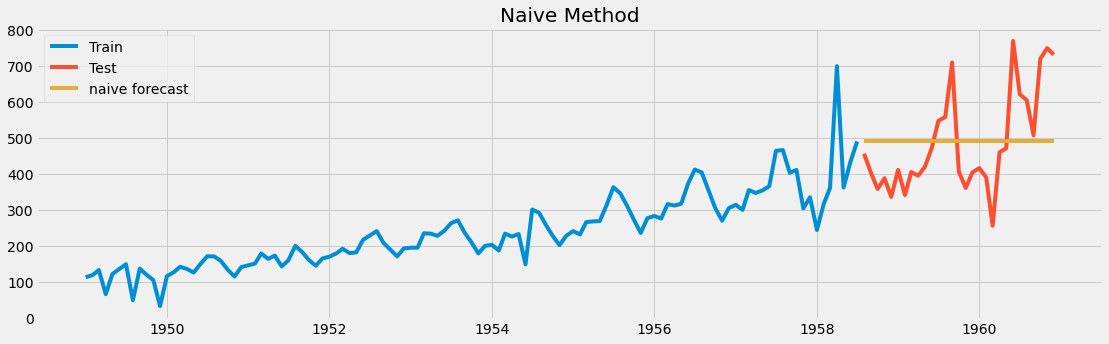

In [30]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_naive['forecasted_naive'], label = 'naive forecast')

plt.legend()
plt.title('Naive Method')
plt.show()

# Simple Average Method
In this method, we take the future predictions equal to the average of all the historical data.

In [31]:
y_avg = test.copy()

y_avg['forecasted_avg'] = train['Customers'].mean()

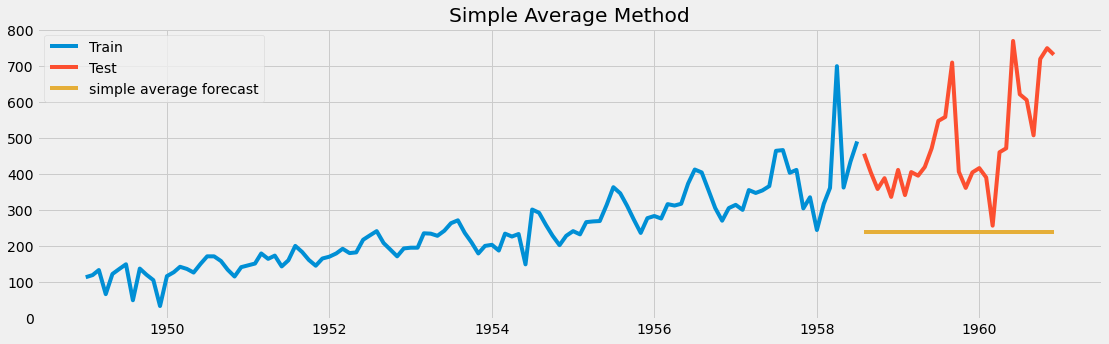

In [32]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_avg['forecasted_avg'], label = 'simple average forecast')

plt.legend()
plt.title('Simple Average Method')
plt.show()

# Simple Moving Average Method
In this method, we take the future predictions equal to the average of a moving window. A window can be a time period of 3 months, 6 months, 9 months or 1 year.

In [33]:
y_moving = data.copy()

window = 9
y_moving["moving_average_forecast"] = data['Customers'].rolling(window).mean()
y_moving['moving_average_forecast'][length_train:] = y_moving['moving_average_forecast'][length_train-1]

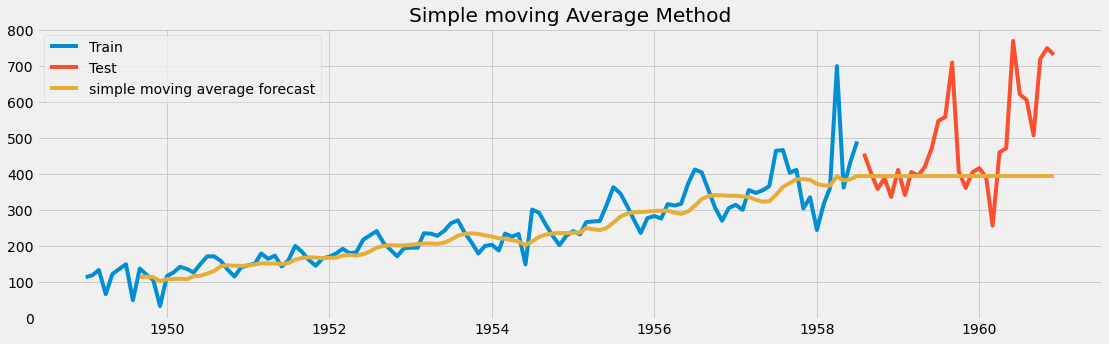

In [34]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_moving['moving_average_forecast'], label = 'simple moving average forecast')

plt.legend()
plt.title('Simple moving Average Method')
plt.show()

# Simple Exponential Smoothing

In [35]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train['Customers'])
model_fit = model.fit(smoothing_level=0.2)
model_fit.params
y_exp = test.copy()
y_exp['Exponential_forecast'] = model_fit.forecast(24)

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


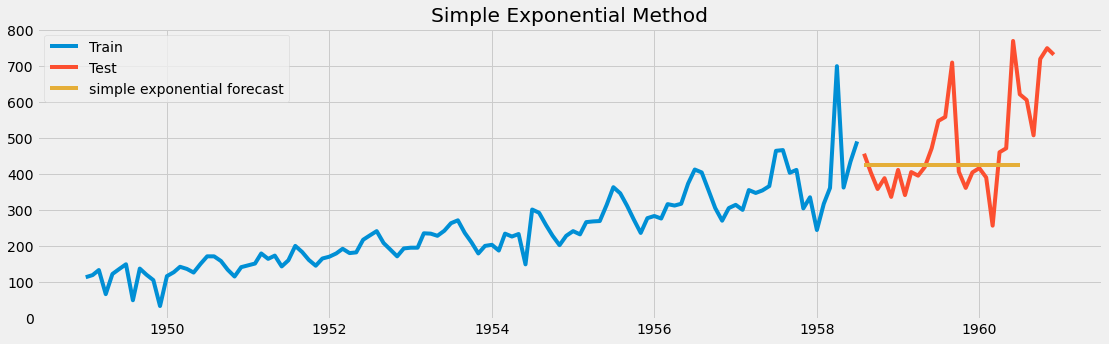

In [36]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_exp['Exponential_forecast'], label = 'simple exponential forecast')

plt.legend()
plt.title('Simple Exponential Method')
plt.show()

# Holt Exponential Smoothing
Holt’s exponential smoothing captures the level and trend of time series in the forecast.

The forecast equation is a function of both level and trend.

y(t+1) = l(t) +b(t) 

Where l(t) is the level component and b(t) is the trend component.

The trend component is calculated as shown

b(t) = β(l(t) - l(t-1)) + (1-β)b(t-1) 

Here beta is the smoothing parameter for trend.


In [37]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train['Customers'], seasonal_periods=12, trend='multiplicative')
model_fit = model.fit(smoothing_level=0.2,smoothing_slope=0.04)
model_fit.params
y_holtexponential = test.copy()
y_holtexponential['holtexponential_forecast'] = model_fit.forecast(24)

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


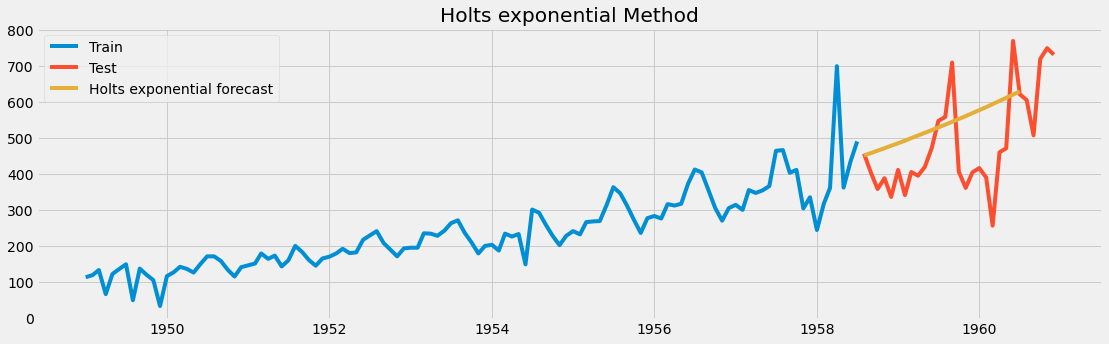

In [38]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_holtexponential['holtexponential_forecast'], label = 'Holts exponential forecast')

plt.legend()
plt.title('Holts exponential Method')
plt.show()

# Holt Winter Exponential Smoothing
This techniques forecasts based on level, trend and seasonality.
The forecast equation for this method includes seasonality.
	
y(t+1) = l(t)+b(t)+s(t+1-m) 
Here m is the number of time a season repeats in a time period.

In [39]:
model = ExponentialSmoothing(train['Customers'], seasonal_periods=12, trend='multiplicative', seasonal='additive')
model_fit = model.fit(smoothing_level=0.2,smoothing_slope=0.04)
model_fit.params
y_holtwinter = test.copy()
y_holtwinter['holtwinter_forecast'] = model_fit.forecast(12)

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


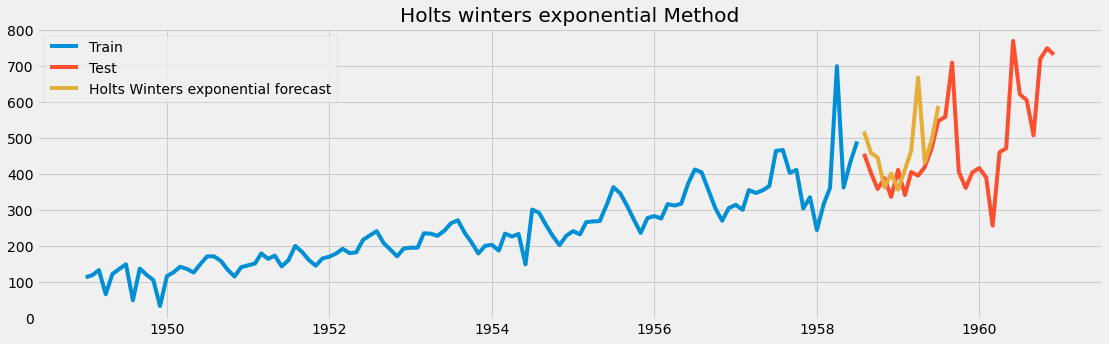

In [40]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_holtwinter['holtwinter_forecast'], label = 'Holts Winters exponential forecast')

plt.legend()
plt.title('Holts winters exponential Method')
plt.show()